In [1]:
import cv2
import random
import numpy as np
from matplotlib import pyplot as plt

ImportError: DLL load failed: 动态链接库(DLL)初始化例程失败。

In [2]:
img_gray = cv2.imread('D:\pythonworkplace\AI_CV\week0\Lenna.png',0)     # 0 是为了读一个灰度图
cv2.imshow('lenna',img_gray)
key = cv2.waitKey()                  # waitkey相当于pause 需要按键响应一下，这个在ipython notebook里的一个显示技巧 大家自己在pycharm中写代码 不用加这句话
if key == 27:                       # 27  是ESC的编码
    cv2.destroyAllWindows()

In [3]:
# to show gray image to show image matrix
print(img_gray)                    # 二维矩阵，每一个是一个整型的数字 [0,25] 256个数 uint int 8
                                   # 0 代表黑，255 代表白  Intensity 亮度

[[169 169 168 ... 175 162 138]
 [169 169 168 ... 175 162 138]
 [169 169 168 ... 175 162 138]
 ...
 [ 53  53  59 ... 115 112 114]
 [ 53  53  64 ... 117 118 122]
 [ 53  53  64 ... 117 118 122]]


In [4]:
# to show image data type
print(img_gray.dtype)

uint8


In [5]:
# to show gray image shape
print(img_gray.shape)  # h, w

(512, 512)


In [3]:
import cv2
img = cv2.imread('D:\pythonworkplace\AI_CV\week0\Lenna.png')
cv2.imshow('lenna',img)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [8]:
# to show color image to show channels
print(img)

[[[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 ...

 [[ 60  18  84]
  [ 60  18  84]
  [ 58  27  92]
  ...
  [ 84  73 173]
  [ 76  68 172]
  [ 79  62 177]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]]


In [9]:
print(img.shape)     # h, w, c   三个通道

(512, 512, 3)


In [2]:
# image crop
img_crop = img[0:100,0:200]
cv2.imshow('img_crop', img_crop)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

NameError: name 'img' is not defined

In [24]:
# color split
#彩色图像用RGB模式在数字设备中存储时有4个通道：R，G，B，Alpha（透明度，一般无用），
#当然也有其他的模式显示比如HSV，CMKY等，在RGB图像中，
#每个通道的数值表示的是RGB分量的强度等级（普通的自然图像将等级划分为0到255），
#而单通道（如R通道）用imshow显示出来的就是R通道的强度，表现为灰度图。
B, G, R = cv2.split(img)
cv2.imshow('B', B)      
cv2.imshow('G', G)
cv2.imshow('R', R)             #  红色通道占的大，所以图片偏暖色调
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [21]:
# change color
def random_light_color(img):
    # brightness
    B, G, R = cv2.split(img)
    
    b_rand = random.randint(-50, 50)
    if b_rand == 0:
        pass
    elif b_rand > 0:
        #让B这个矩阵（图像）中 凡是>lim的元素都赋值为255，
        #目的是怕 它们加上g_rand以后会超过255，就越界了
        #B[B > lim] 表示一个 保留大于lim的元素不变而把其他元素置为0的矩阵，
        #矩阵大小与B相同
        lim = 255 - b_rand              
        B[B > lim] = 255
        B[B <= lim] = (b_rand + B[B <= lim]).astype(img.dtype)
    elif b_rand < 0:
        lim = 0 - b_rand
        B[B < lim] = 0
        B[B >= lim] = (b_rand + B[B >= lim]).astype(img.dtype)
        
    g_rand = random.randint(-50, 50)
    if g_rand == 0:
        pass
    elif g_rand > 0:
        lim = 255 - g_rand
        G[G > lim] = 255
        G[G <= lim] = (g_rand + G[G <= lim]).astype(img.dtype)
    elif g_rand < 0:
        lim = 0 - g_rand
        G[G < lim] = 0
        G[G >= lim] = (g_rand + G[G >= lim]).astype(img.dtype)
    
    r_rand = random.randint(-50,50)
    if r_rand == 0:
        pass
    elif r_rand > 0:
        lim = 255 - r_rand
        R[R > lim] = 255
        R[R <= lim] = (r_rand + R[R <= lim]).astype(img.dtype)
    elif r_rand < 0:
        lim = 0 - r_rand
        R[R < lim] = 0
        R[R >= lim] = (r_rand + R[R >= lim]).astype(img.dtype)
    
    img_merge = cv2.merge((B, G, R))
    # img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img_merge

img_random_color = random_light_color(img)
cv2.imshow('img_random_color', img_random_color)
cv2.imshow('img_ori', img)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()


In [4]:
##############################
# gamma correction
img_dark = cv2.imread('D:\pythonworkplace\AI_CV\week0\Lenna.png')
cv2.imshow('img_dark', img_dark)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
def adjust_gamma(image, gamma=1.0):
    # gamma校正之后，原来线性，变成曲线，拉伸关系
    invGamma = 1.0/gamma      
    table = []
    for i in range(256):
        table.append(((i / 255.0) ** invGamma) * 255)
    table = np.array(table).astype("uint8")
    return cv2.LUT(img_dark, table)
img_brighter = adjust_gamma(img_dark, 2)
cv2.imshow('img_dark', img_dark)
cv2.imshow('img_brighter', img_brighter)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

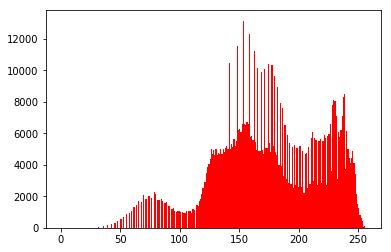

In [6]:
#############################
# histogram
img_small_brighter = cv2.resize(img_brighter, (int(img_brighter.shape[0]*0.5),int(img_brighter.shape[1]*0.5)))
plt.hist(img_brighter.flatten(), 256, [0, 256], color = 'r')
img_yuv = cv2.cvtColor(img_small_brighter, cv2.COLOR_BGR2YUV)
# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])    # only for 1 channel
#cv2.imshow('img_yuv', img_yuv)         img_yuv y:明亮度 u:色度 v:饱和度
#Y, U, V = cv2.split(img_yuv)
#cv2.imshow('Y', Y)
#cv2.imshow('U', U)
#cv2.imshow('V', V)
# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)  # y:luminance(明亮度)， u&v: 色度饱和度
cv2.imshow('Color imput image', img_small_brighter)
cv2.imshow('Histogram equalized', img_output)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()


In [18]:
###############################
# rotation
M = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), 30, 1) 
# center, angle, scale
img_rotate = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imshow('rotated lenna', img_rotate)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [20]:
print(M)
M[0][2] = M[1][2] = 0
print(M)
img_rotate2 = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imshow('rotated lenna2', img_rotate2)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

#explain translation


[[ 0.8660254  0.5        0.       ]
 [-0.5        0.8660254  0.       ]]
[[ 0.8660254  0.5        0.       ]
 [-0.5        0.8660254  0.       ]]


In [22]:
# scale + rotation + translation = similarity transform
M = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), 30, 0.5) 
# center,angle,scale
img_rotate = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imshow('rotated lenna', img_rotate)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
print(M)

[[  0.4330127    0.25        81.14874832]
 [ -0.25         0.4330127  209.14874832]]


In [25]:
###############################
# Affine Transform
rows, cols, ch = img.shape
pts1 = np.float32([[0, 0], [cols - 1, 0], [0, rows-1]])
pts2 = np.float32([[cols * 2, rows * 0.1], [cols * 0.9, rows * 0.2], [cols *0.1, rows * 0.9]])

M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (cols, rows))

cv2.imshow('affine lenna', dst)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [4]:
################################
# perspective transform
def random_warp(img, row, col):
    height, width, channels = img.shape
    
    #warp:
    random_margin = 60
    x1 = random.randint(-random_margin, random_margin)
    y1 = random.randint(-random_margin, random_margin)
    x2 = random.randint(width - random_margin - 1, width - 1)
    y2 = random.randint(-random_margin, random_margin)
    x3 = random.randint(width - random_margin - 1, width - 1)
    y3 = random.randint(height - random_margin - 1, height - 1)
    x4 = random.randint(-random_margin, random_margin)
    y4 = random.randint(height - random_margin - 1, height - 1)
    
    dx1 = random.randint(-random_margin, random_margin)
    dy1 = random.randint(-random_margin, random_margin)
    dx2 = random.randint(width - random_margin - 1, width - 1)
    dy2 = random.randint(-random_margin, random_margin)
    dx3 = random.randint(width - random_margin - 1, width - 1)
    dy3 = random.randint(height - random_margin - 1, height - 1)
    dx4 = random.randint(-random_margin, random_margin)
    dy4 = random.randint(height - random_margin - 1, height - 1)
    
    pts1 = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
    pts2 = np.float32([[dx1, dy1], [dx2, dy2], [dx3, dy3], [dx4, dy4]])
    M_warp = cv2.getPerspectiveTransform(pts1, pts2)
    img_warp = cv2.warpPerspective(img, M_warp, (width, height))
    return M_warp, img_warp

M_warp, img_warp = random_warp(img, img.shape[0], img.shape[1])
cv2.imshow('lenna_warp', img_warp)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()